# Homework 3

In [1]:
from pandas import Series, DataFrame
import pandas as pd

import statsmodels.api as sm
from patsy import dmatrices

import matplotlib.pyplot as plt



[Q1 8 points] Read the data. Read in the data from http://www.stat.ufl.edu/~winner/data/clinton1.dat. Note that this is NOT a CSV file. The description of the data fields are present in http://www.stat.ufl.edu/~winner/data/clinton1.txt. You will have to figure out the right parameters for the read csv command yourself (e.g., the regular expression for the delimiter, and the names of the columns).

In [2]:
names = ['Country Name','State','percentVoting','MedianAge','MeanSavings','PerCapitaIncome',\
         'PercentinPoverty','PercentVeterans','PercentFemale','PopulationDensity','PercentinNursingHomes',\
         'CrimeIndex']

clinton = pd.read_csv('http://www.stat.ufl.edu/~winner/data/clinton1.dat',header = None, sep="\s\s+|,",names = names)

clinton.head(15)

C:\Users\jerry\Anaconda3\envs\CS 329E\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Country Name,State,percentVoting,MedianAge,MeanSavings,PerCapitaIncome,PercentinPoverty,PercentVeterans,PercentFemale,PopulationDensity,PercentinNursingHomes,CrimeIndex
0,Autauga,AL,30.92,31.7,57623,15768.0,15.2,10.74,51.41,60.4,2.36,457.0
1,Baldwin,AL,26.24,35.5,84935,16954.0,13.6,9.73,51.34,66.5,5.40,282.0
2,Barbour,AL,46.36,32.8,83656,15532.0,25.0,8.82,53.03,28.8,7.02,47.0
3,Blount,AL,32.92,34.5,61249,14820.0,15.0,9.67,51.15,62.4,2.36,185.0
4,Bullock,AL,67.67,31.7,75725,11120.0,33.0,7.08,50.76,17.6,2.91,141.0
5,Butler,AL,47.43,33.5,75887,12015.0,27.1,9.48,53.25,28.1,7.98,266.0
6,Calhoun,AL,38.44,32.7,76073,15162.0,18.0,11.95,51.66,190.8,4.81,560.0
7,Chambers,AL,45.36,34.8,40498,13887.0,18.8,10.52,52.77,62.1,6.15,218.0
8,Cherokee,AL,53.61,36.3,56386,13936.0,15.4,9.29,50.82,35.8,5.61,51.0
9,Chilton,AL,34.19,34.0,52230,14036.0,18.6,9.48,51.41,47.8,3.58,296.0


[Q2 8 points] Predict percentVoting on all regressors. One of the fields in the data is “Percent voting for Clinton in 1992”; let’s call it percentVoting. Regress percentVoting on all available regressors. Which two regressors have the worst p-values?

In [3]:
# Step 1: Create design matrices
y, X = dmatrices('percentVoting ~ MeanSavings + MedianAge + PerCapitaIncome + PercentinPoverty + PercentVeterans + PercentFemale + PopulationDensity + PercentinNursingHomes + CrimeIndex', data=clinton, return_type='dataframe')
y[:3]

#Step 2: Run the Regression
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()


'''The two worst p-values are Median Age and CrimeIndex'''

                            OLS Regression Results                            
Dep. Variable:          percentVoting   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     143.4
Date:                Fri, 26 Apr 2019   Prob (F-statistic):          1.71e-221
Time:                        12:17:19   Log-Likelihood:                -9569.0
No. Observations:                2703   AIC:                         1.916e+04
Df Residuals:                    2693   BIC:                         1.922e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -38.24

'The two worst p-values are Median Age and CrimeIndex'

[Q3 8 points] A formula-creating function. Write a function called
formula that takes a list of regressors as input, and outputs the formula for
regressing percentVoting on these regressors.
For example, formula([’age’, ’savings’]) should output
percentVoting ∼ age + savings.

In [4]:
result.params

def formula(regressors_list):
    output = "percentVoting ~ "
    for key,i in enumerate(regressors_list):
        if key < len(regressors_list) - 1:
            output += str(i) + " + "
        else:
            output += str(i)
            
        
        
    return output


print(formula(["age","savings","income"]))
        

percentVoting ~ age + savings + income


[Q4 8 points] R-squared computation function. Write a function
called rsquared that, given a list of regressors, returns the R-squared corresponding to a regression of percentVoting with respect to the list of regressors. You can use the formula function you wrote above

In [5]:
def rsquared(regressors_list):
    d_matrice = formula(regressors_list)
    
    y, X = dmatrices(d_matrice, data=clinton, return_type='dataframe')

    #Step 2: Run the Regression
    model = sm.OLS(y, X)       # Set up the model
    result = model.fit()       # Fit model (find the intercept and slopes)
    return result.rsquared
    
    
r_squared = rsquared(['MedianAge','MeanSavings','CrimeIndex'])

print(r_squared)
    

0.0318482207228


[Q5 8 points] Find the next best regressor. Write a function called
best next regressor that, given a list of regressors (called current regressor list)
and the list of all possible regressors (called all regressors list), picks one
regressor from all regressors list that, when combined with the regressors in current regressor list, yields the highest R-square. The function
should return this regressor, and the corresponding R-square

In [6]:
def best_next_regressor(current_regressor_list, all_regressors_list):
    best_regressor = "N/A"
    best_R_squared = 0

    
    for i in all_regressors_list:        
        if i not in current_regressor_list:
            current_regressor_list.append(i)

            current_rsquared = rsquared(current_regressor_list)

            if current_rsquared > best_R_squared:
                best_R_squared = current_rsquared
                best_regressor = i 
            else:
                del current_regressor_list[-1]
        
    return best_regressor, best_R_squared


regressor,r_squared = best_next_regressor(['MedianAge','MeanSavings'],['MedianAge','MeanSavings','PerCapitaIncome',\
         'PercentinPoverty','PercentVeterans','PercentFemale','PopulationDensity','PercentinNursingHomes',
         'CrimeIndex'])
    
print(regressor)   
print(r_squared)
    
    
    #["MedianAge","MeanSavings"]

CrimeIndex
0.323962210052


[Q6 8 points] Pick the k best regressors. Write a function called
best regressors that takes two arguments:
• num regressors, which is the number of regressors we want, and
• all regressors list, which again is the list of all possible regressors.
The function should compute the best num regressors regressors by picking
them one at a time using best next regressor that you wrote above. The
function should return a tuple of the following items:
• a list of the best regressors, in the order in which they were picked, and
• the corresponding R-square values.
In other words, you want a list of the results of calling best next regressor.

In [14]:
def best_regressors (num_regressors,all_regressors_list):
    list_of_results =[]
    current_regressors_list = ["CrimeIndex"]
    best_rsquared = 0
    

    while len(current_regressors_list) < num_regressors:
        regressor,r_squared = best_next_regressor(current_regressors_list,all_regressors_list)
        current_regressors_list.append(regressor)
        print(regressor)
        print(len(current_regressors_list))
            
            
    return current_regressors_list


print(best_regressors(4,['MedianAge','MeanSavings','PerCapitaIncome',\
         'PercentinPoverty','PercentVeterans','PercentFemale','PopulationDensity','PercentinNursingHomes',
         'CrimeIndex']))


PercentinNursingHomes
10
['CrimeIndex', 'MedianAge', 'MeanSavings', 'PerCapitaIncome', 'PercentinPoverty', 'PercentVeterans', 'PercentFemale', 'PopulationDensity', 'PercentinNursingHomes', 'PercentinNursingHomes']


[Q7 8 points] Order all regressors in the best order.Runbestregressorsto output all available regressors in sequence.  In other words, the first itemin the result should be the best single regressor, the second item should bethe next best regressor that combined with the first regressor gives the bestR-square, and so on.This idea of ordering the regressors in this particular order is calledfor-ward selection, and is one way of selecting only a few regressors when givena large set of regressors.

In [13]:
regressors = ['MedianAge','MeanSavings','PerCapitaIncome',\
         'PercentinPoverty','PercentVeterans','PercentFemale','PopulationDensity','PercentinNursingHomes',\
         'CrimeIndex']

order_regressors, order_rsquared = (best_regressors(len(regressors),regressors))

print(order_regressors)
print(order_rsquared)

PercentinNursingHomes
10


ValueError: too many values to unpack

In [9]:
#8

r_square_dict = {}
for index, value in enumerate(order_regressors):
    regression_list = order_regressors[0:index]
    if len(regression_list) != 0:
        current_r_square = rsquared(regression_list)
        r_square_dict[index] = current_r_square


plot_df = pd.DataFrame(r_square_dict, index=[0])

plot_df.columns.name = 'Num of Regressors'

plot_df.T.plot(kind = 'bar')


NameError: name 'order_regressors' is not defined

[Q9 8 points] Create a classiﬁcation target. Attach a new column, called target to the DataFrame, whose value for each row is either 1 (if percentVoting is at least 40.0), or 0 (percentVoting is less than 40.0).

In [8]:
data_copy = clinton

data_copy['target'] = 0.0
mask = data_copy['percentVoting'] >= 40.0

data_copy.loc[mask, 'target'] = 1.0
data_copy[:5]

,Country Name,State,percentVoting,MedianAge,MeanSavings,PerCapitaIncome,PercentinPoverty,PercentVeterans,PercentFemale,PopulationDensity,PercentinNursingHomes,CrimeIndex,target
0,Autauga,AL,30.92,31.7,57623,15768.0,15.2,10.74,51.41,60.4,2.36,457.0,0.0
1,Baldwin,AL,26.24,35.5,84935,16954.0,13.6,9.73,51.34,66.5,5.40,282.0,0.0
2,Barbour,AL,46.36,32.8,83656,15532.0,25.0,8.82,53.03,28.8,7.02,47.0,1.0
3,Blount,AL,32.92,34.5,61249,14820.0,15.0,9.67,51.15,62.4,2.36,185.0,0.0
4,Bullock,AL,67.67,31.7,75725,11120.0,33.0,7.08,50.76,17.6,2.91,141.0,1.0


[Q10 8 points] Create training and test sets. Create design matrices for predicting the target using just the two features poverty and popdensity. Split this into design matrices for training and testing datasets, with 70% data being used for training, and 30% for testing.

In [9]:
from sklearn.model_selection import train_test_split
Y, X = dmatrices('target ~ PercentinPoverty + PopulationDensity', data=
                 data_copy,return_type="dataframe")

y = Y['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

[Q11 12 points] Accuracy of classiﬁcation. Use a K-nearest neighbors classiﬁer to predict the target using the two given features, using 1,3,5,10,20,50,100, and 1000 nearest neighbors respectively. Print out the training and test accuracy for each of these.

In [10]:
from sklearn import neighbors
from sklearn import metrics
features = [1,3,5,10,20,50,100,1000]

for i in features:
        
    model = neighbors.KNeighborsClassifier(n_neighbors=i,
                                       weights='uniform',
                                       p=2)
    model.fit(X_train, y_train)
    
    prediction_on_training = model.predict(X_train)
    predicted_classes = model.predict(X_test)
    
    print "Number of Features: ",i
    print "Accuracy on Training Set: ",metrics.accuracy_score(y_train, prediction_on_training)
    print "Accuracy on Testing Set:", metrics.accuracy_score(y_test, predicted_classes)
    print

Number of Features:  1
Accuracy on Training Set:  0.997885835095
Accuracy on Testing Set: 0.599753694581

Number of Features:  3
Accuracy on Training Set:  0.788054968288
Accuracy on Testing Set: 0.634236453202

Number of Features:  5
Accuracy on Training Set:  0.748414376321
Accuracy on Testing Set: 0.630541871921

Number of Features:  10
Accuracy on Training Set:  0.720930232558
Accuracy on Testing Set: 0.647783251232

Number of Features:  20
Accuracy on Training Set:  0.690274841438
Accuracy on Testing Set: 0.658866995074

Number of Features:  50
Accuracy on Training Set:  0.683932346723
Accuracy on Testing Set: 0.662561576355

Number of Features:  100
Accuracy on Training Set:  0.677589852008
Accuracy on Testing Set: 0.665024630542

Number of Features:  1000
Accuracy on Training Set:  0.567653276956
Accuracy on Testing Set: 0.576354679803



[Q12 8 points] Plots and reasons. Show a scatter plot of popdensity versus poverty, and color the points according to the target (i.e., each point in the scatter plot represents a county, and the color of the county depends on the value of target for that county). Can you interpret the plot? What types of counties voted for Bill Clinton?

Text(0,0.5,'Percent in Poverty')

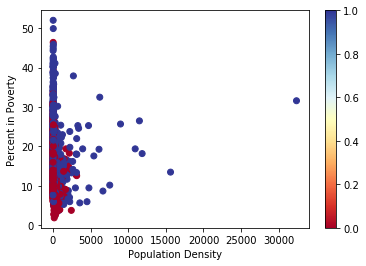

In [23]:
sc = plt.scatter(data_copy['PopulationDensity'], data_copy['PercentinPoverty'], c=y, cmap='RdYlBu')
plt.colorbar(sc)
plt.xlabel('Population Density')
plt.ylabel('Percent in Poverty')

From the graph, it looks the the counties with higher than 5000 population density voted for Clinton. With counties less than 5000, the ones with higher Percent in Poverty also voted for Clinton. The counties with lower than 30 percent in Poverty did not vote for Clinton and most of them stayed below 5000 in population density